In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras 
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FastICA
import umap




In [16]:
data = pd.read_csv('../data/data.csv')
gene_types = data['gene_type'].unique()

selected_gene_types = []
for gene_type in gene_types:
  df = data[data['gene_type'] == gene_type]
  #filter out gene types with low sample count 
  if len(df) >= 1000:
    selected_gene_types.append(gene_type)
selected_gene_types.remove('miRNA')

selected_gene_types

['protein_coding',
 'pseudogene',
 'antisense',
 'lincRNA',
 'misc_RNA',
 'snRNA',
 'snoRNA']

In [17]:
data

,gene_id,gene_name,gene_type,BC01_Pooled,BC01_Tumor,BC02_Pooled,BC03_Pooled,BC03LN_Pooled,BC04_Pooled,BC05_Pooled,...,BC11_04,BC11_07,BC11_28,BC11_43,BC11_56,BC11_69,BC11_70,BC11_78,BC11_81,BC11_88
0,ENSG00000000003.10,TSPAN6,protein_coding,2.33,1.25,43.96,7.64,9.32,133.37,84.77,...,0.00,47.44,16.11,0.00,6.56,0.00,0.00,0.00,200.82,0.00
1,ENSG00000000005.5,TNMD,protein_coding,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,ENSG00000000419.8,DPM1,protein_coding,60.70,28.44,74.73,41.41,87.69,120.41,70.67,...,198.96,0.00,0.00,20.63,0.00,0.00,0.00,136.07,22.03,204.58
3,ENSG00000000457.9,SCYL3,protein_coding,47.93,4.43,9.89,7.61,7.32,12.42,12.02,...,0.00,10.96,0.00,0.00,0.00,0.27,0.00,0.07,0.19,9.52
4,ENSG00000000460.12,C1orf112,protein_coding,4.79,1.67,10.87,0.92,15.13,17.10,5.69,...,0.00,6.97,9.02,0.00,0.00,0.14,247.69,22.60,11.35,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57910,ERCC-00170,ERCC-00170,ERCC,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
57911,ERCC-00171,ERCC-00171,ERCC,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
57912,SPIKE1,EC2,SPIKE_IN,14940.70,45728.19,10442.91,94250.71,40823.13,24540.58,12613.85,...,166346.51,54443.35,120842.89,135291.06,138048.60,58840.26,65246.34,33465.11,108901.35,57492.01
57913,SPIKE2,EC15,SPIKE_IN,985.82,607.50,362.55,2949.35,1291.13,854.53,399.57,...,6860.84,2136.69,4048.09,4062.59,4147.05,2286.91,2821.49,1652.19,3439.53,1837.41


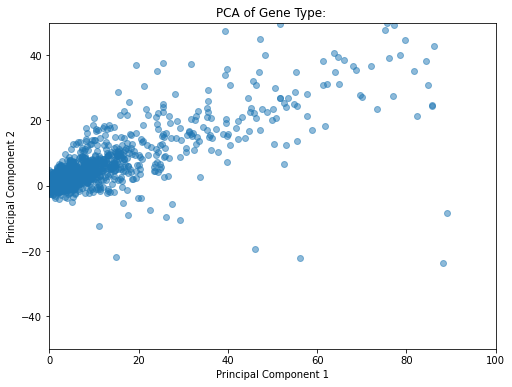

In [7]:
def plt_PCA(data):
  '''PCA'''
  # Separate gene ID and gene name columns
  gene_info = data[['gene_id', 'gene_name', 'gene_type']]
  # Select only the expression data columns for PCA
  expression_data = data.drop(['gene_id', 'gene_name', 'gene_type'], axis=1)

  # Standardize the data
  scaler = StandardScaler()
  scaled_data = scaler.fit_transform(expression_data)

  # Apply PCA
  pca = PCA(n_components=2)  # You can change the number of components as needed
  principal_components = pca.fit_transform(scaled_data)

  # Create a DataFrame for the principal components
  principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

  # Concatenate the principal components DataFrame with the gene info
  result = pd.concat([gene_info, principal_df], axis=1)

  # Visualize the PCA results
  plt.figure(figsize=(8, 6))
  plt.scatter(result['PC1'], result['PC2'], alpha=0.5)
  plt.xlabel('Principal Component 1')
  plt.ylabel('Principal Component 2')
  plt.title('PCA of Gene Type: ')

  plt.xlim(0,100)
  plt.ylim(-50,50)
  plt.show()
plt_PCA(data[data['gene_type'] == 'protein_coding'])


d:\CS Software\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\CS Software\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


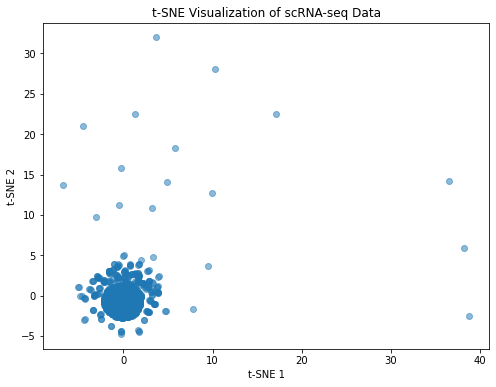

In [8]:
def plt_tsne(data):
  '''TSNE'''
  selected_columns = data.iloc[:, 3:]  

  tsne = TSNE(n_components=2, perplexity=30)  # Adjust parameters as needed

  # Perform t-SNE
  tsne_result = tsne.fit_transform(selected_columns)

  # Convert t-SNE result to a DataFrame for visualization
  tsne_df = pd.DataFrame(tsne_result, columns=['tsne_1', 'tsne_2'])

  # Plot the t-SNE result
  plt.figure(figsize=(8, 6))
  plt.scatter(tsne_df['tsne_1'], tsne_df['tsne_2'], alpha=0.5)
  plt.title('t-SNE Visualization of scRNA-seq Data')
  plt.xlabel('t-SNE 1')
  plt.ylabel('t-SNE 2')
  plt.show()


plt_tsne(data[data['gene_type'] == 'snoRNA'])

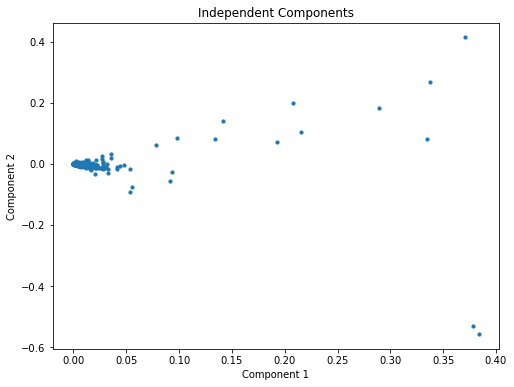

In [9]:
'''ICA'''

def plt_ICA(data):
  gene_expression = data.iloc[:, 3:]  

  # Assuming you have your data loaded into a variable named 'data'
  # Replace this with your actual data loading process

  # Create an ICA object
  ica = FastICA(n_components=2, random_state=42)

  # Fit the ICA model to your data
  ica.fit(gene_expression)

  # Transform the gene_expression to the independent components
  independent_components = ica.transform(gene_expression)

  # Plot the independent components (assuming it's 2D)
  plt.figure(figsize=(8, 6))
  plt.scatter(independent_components[:, 0], independent_components[:, 1], s=10)
  plt.title('Independent Components')
  plt.xlabel('Component 1')
  plt.ylabel('Component 2')
  plt.show()

plt_ICA(data[data['gene_type'] == 'protein_coding'])



Epoch 1/50
46/46 [==============================] - 1s 5ms/step - loss: 97.9818
Epoch 2/50
46/46 [==============================] - 0s 5ms/step - loss: 15.1304
Epoch 3/50
46/46 [==============================] - 0s 6ms/step - loss: 8.1878
Epoch 4/50
46/46 [==============================] - 0s 4ms/step - loss: 5.5713
Epoch 5/50
46/46 [==============================] - 0s 4ms/step - loss: 3.8082
Epoch 6/50
46/46 [==============================] - 0s 4ms/step - loss: 2.4738
Epoch 7/50
46/46 [==============================] - 0s 4ms/step - loss: 1.7439
Epoch 8/50
46/46 [==============================] - 0s 4ms/step - loss: 1.2353
Epoch 9/50
46/46 [==============================] - 0s 4ms/step - loss: 0.8764
Epoch 10/50
46/46 [==============================] - 0s 4ms/step - loss: 0.5988
Epoch 11/50
46/46 [==============================] - 0s 4ms/step - loss: 0.4489
Epoch 12/50
46/46 [==============================] - 0s 5ms/step - loss: 0.3386
Epoch 13/50
46/46 [==========================

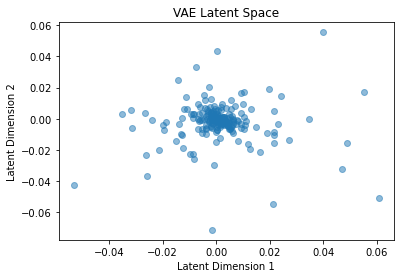

In [10]:
'''VAE'''

def plt_VAE(data):
    # Extract the expression data (assuming it starts from the 4th column)
    expression_data = data.iloc[:, 3:].values

    # Normalize the data
    expression_data = (expression_data - np.min(expression_data)) / (np.max(expression_data) - np.min(expression_data))

    # Define the VAE architecture
    latent_dim = 2  # Set the number of latent dimensions

    # Encoder
    encoder_inputs = keras.Input(shape=(expression_data.shape[1],))
    x = keras.layers.Dense(256, activation='relu')(encoder_inputs)
    x = keras.layers.Dense(128, activation='relu')(x)
    z_mean = keras.layers.Dense(latent_dim, name='z_mean')(x)
    z_log_var = keras.layers.Dense(latent_dim, name='z_log_var')(x)

    # Reparameterization trick to sample from the latent space
    def sampling(args):
        z_mean, z_log_var = args
        epsilon = tf.keras.backend.random_normal(shape=(tf.shape(z_mean)[0], latent_dim), mean=0., stddev=1.)
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

    z = keras.layers.Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

    # Decoder
    decoder_inputs = keras.layers.Dense(128, activation='relu')(z)
    decoder_outputs = keras.layers.Dense(expression_data.shape[1], activation='sigmoid')(decoder_inputs)

    # Define the VAE model
    vae = keras.Model(encoder_inputs, decoder_outputs)

    # Define the VAE loss
    reconstruction_loss = tf.keras.losses.mean_squared_error(encoder_inputs, decoder_outputs)
    reconstruction_loss *= expression_data.shape[1]
    kl_loss = 1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
    kl_loss = tf.reduce_mean(kl_loss)
    kl_loss *= -0.5
    vae_loss = tf.reduce_mean(reconstruction_loss + kl_loss)
    vae.add_loss(vae_loss)

    # Compile the VAE model
    vae.compile(optimizer='adam')

    # Train the VAE model
    vae.fit(expression_data, epochs=50, batch_size=32)

    # Encode data into the latent space
    encoder = keras.Model(encoder_inputs, z_mean)
    encoded_data = encoder.predict(expression_data)

    # Visualize the latent space
    plt.scatter(encoded_data[:, 0], encoded_data[:, 1], alpha=0.5)
    plt.title('VAE Latent Space')
    plt.xlabel('Latent Dimension 1')
    plt.ylabel('Latent Dimension 2')
    plt.show()
plt_VAE(data[data['gene_type'] == 'snoRNA'])

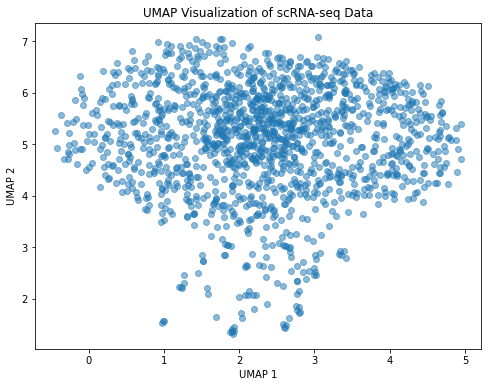

In [15]:
def plt_umap(data):
  selected_columns = data.iloc[:, 3:]  
  umap_reducer = umap.UMAP(n_components=2)  

  umap_result = umap_reducer.fit_transform(selected_columns)

  umap_df = pd.DataFrame(umap_result, columns=['umap_1', 'umap_2'])

  plt.figure(figsize=(8, 6))
  plt.scatter(umap_df['umap_1'], umap_df['umap_2'], alpha=0.5)
  plt.title('UMAP Visualization of scRNA-seq Data')
  plt.xlabel('UMAP 1')
  plt.ylabel('UMAP 2')
  plt.show()

plt_umap(data[data['gene_type'] == 'snoRNA'])


Principal Component 1: Explained Variance Ratio = 0.5686
Principal Component 2: Explained Variance Ratio = 0.1019
Principal Component 3: Explained Variance Ratio = 0.0628
Principal Component 4: Explained Variance Ratio = 0.0313
Principal Component 5: Explained Variance Ratio = 0.0217
Principal Component 6: Explained Variance Ratio = 0.0196
Principal Component 7: Explained Variance Ratio = 0.0143
Principal Component 8: Explained Variance Ratio = 0.0126
Principal Component 9: Explained Variance Ratio = 0.0114
Principal Component 10: Explained Variance Ratio = 0.0093

Cumulative Explained Variance:
[0.56856221 0.6705052  0.73331664 0.76462643 0.78635126 0.80594578
 0.82020637 0.83282688 0.84419301 0.85344888]


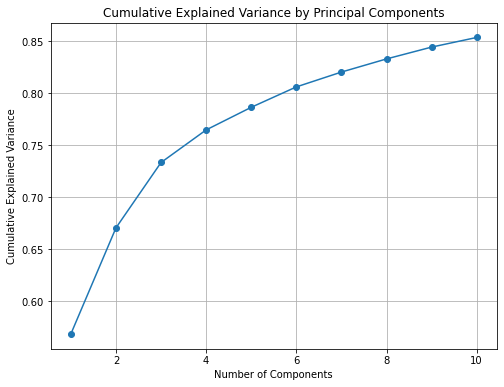

In [15]:
from sklearn.decomposition import PCA
import pandas as pd

# Separate gene ID and gene name columns
gene_info = data[['gene_id', 'gene_name', 'gene_type']]
# Select only the expression data columns for PCA
expression_data = data.drop(['gene_id', 'gene_name', 'gene_type'], axis=1)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(expression_data)

# Apply PCA
pca = PCA(n_components=10)  # You can change the number of components as needed
principal_components = pca.fit_transform(scaled_data)

# Get the explained variance ratios for each principal component
explained_variances = pca.explained_variance_ratio_

# Calculate cumulative explained variance
cumulative_explained_variance = explained_variances.cumsum()

# Print explained variance ratios for each principal component
for i, explained_variance in enumerate(explained_variances):
    print(f"Principal Component {i + 1}: Explained Variance Ratio = {explained_variance:.4f}")

# Print cumulative explained variance
print(f"\nCumulative Explained Variance:\n{cumulative_explained_variance}")

# Plotting the explained variance ratios for each component
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variances) + 1), cumulative_explained_variance, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.grid(True)
plt.show()